# Climate analysis

## Meteostat

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Point Data

In [3]:
import meteostat

In [4]:
puebla = meteostat.Point(19.12, -98.28)

### Weather Stations

In [5]:
from meteostat import Stations

Getting stations in Puebla State, Mexico.

In [6]:
stations = Stations()
stations = stations.region('MX','PUE')
stations = stations.fetch(stations.count())

print(stations)

                           name country region    wmo  icao  latitude  \
id                                                                      
76685              Puebla, Pue.      MX    PUE  76685  MMPB   19.0500   
MMHC0  Tehuacan / Cinco Señores      MX    PUE   <NA>  MMHC   18.4971   

       longitude  elevation             timezone hourly_start hourly_end  \
id                                                                         
76685   -98.1667     2179.0  America/Mexico_City   1973-01-02 2024-09-19   
MMHC0   -97.4198     1679.0  America/Mexico_City   1973-01-01 1977-02-01   

      daily_start  daily_end monthly_start monthly_end  
id                                                      
76685  1975-04-04 2024-12-30    1988-01-01  2022-01-01  
MMHC0         NaT        NaT           NaT         NaT  


Getting the nearest station to the coordinate.

In [7]:
stations = Stations()
stations = stations.nearby(19.12, -98.28)
stations = stations.fetch(1)

print(stations)

               name country region    wmo  icao  latitude  longitude  \
id                                                                     
76685  Puebla, Pue.      MX    PUE  76685  MMPB     19.05   -98.1667   

       elevation             timezone hourly_start hourly_end daily_start  \
id                                                                          
76685     2179.0  America/Mexico_City   1973-01-02 2024-09-19  1975-04-04   

       daily_end monthly_start monthly_end      distance  
id                                                        
76685 2024-12-30    1988-01-01  2022-01-01  14224.477944  


### Hourly Data

In [8]:
from datetime import datetime
from meteostat import Hourly

#Set time period
start = datetime(2024, 9, 14, 00, 00)
end = datetime(2024, 9, 14, 23, 59)

#Get hourly data
data = Hourly(stations.wmo[0],start, end)
data = data.fetch()

Visualizing data.

<Axes: xlabel='time', ylabel='temp'>

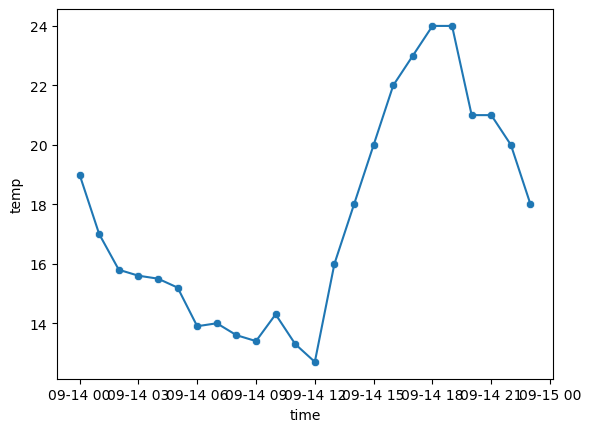

In [9]:
sns.scatterplot(x='time', y='temp', data=data)
sns.lineplot(x='time', y='temp', data=data)

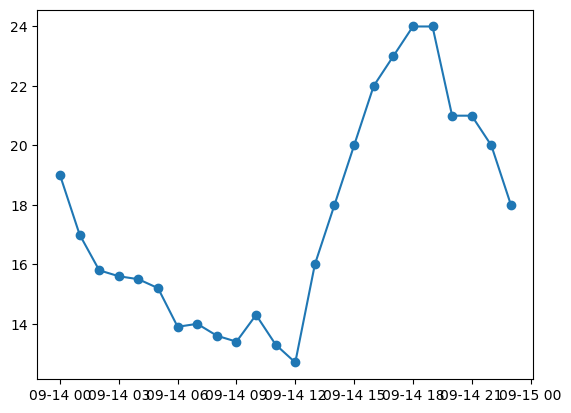

In [10]:
plt.scatter(x = data.index, y = data['temp'])
plt.plot(data.index, data['temp'])

#### Coverage

In [11]:
from datetime import datetime
from meteostat import Hourly

start = datetime(1974, 9, 16)
end = datetime(2024, 9, 16)

data = Hourly('76685', start=start, end=end)
coverage_50_years = data.coverage()

start = datetime(1994, 9, 16)
end = datetime(2024, 9, 16)

data = Hourly('76685', start = start, end = end)
coverage_30_years = data.coverage()

print('For 50 years the period the coverage is ' + '{:.2f}'.format(coverage_50_years * 100) 
      + '% and for 30 years is ' + '{:.2f}'.format(coverage_30_years * 100) + '%')

For 50 years the period the coverage is 39.54% and for 30 years is 50.45%


### Daily Data

In [14]:
from meteostat import Daily

In [16]:
start = datetime(1974, 1, 1)
end = datetime(2024, 1, 1)

data = Daily('76685', start, end)
data = data.fetch()

data.head(1)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1975-04-04,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='time'>

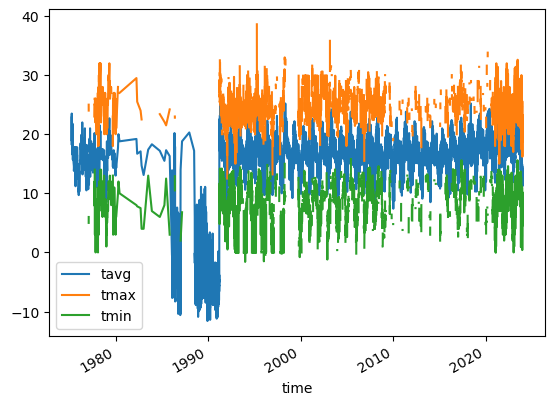

In [17]:
data.plot(y=['tavg','tmax','tmin'])